In [22]:
%matplotlib inline

import matplotlib.pyplot as plt
import cv2
import pickle
import gzip
import numpy as np
import skvideo
skvideo.setFFmpegPath("C:\\Program Files\\ffmpeg-4.0.2-win64-static\\bin\\")
import skvideo.io
import skvideo.io
import os
from kafka import SimpleProducer, KafkaClient
NCAMS = 100

In [23]:
#!wget http://deeplearning.net/data/mnist/mnist.pkl.gz

In [24]:
def mnist_images_labels(nsplits=NCAMS):
    with gzip.open('../data/mnist.pkl.gz', 'rb') as f:
        u = pickle._Unpickler(f)
        u.encoding = 'latin1'
        train_set, valid_set, test_set = u.load()
    
    trainx, trainy = train_set
    valx, valy = valid_set
    
    images = np.concatenate([trainx.reshape(-1, 28, 28, 1), valx.reshape(-1, 28, 28, 1)])
    labels = np.concatenate([trainy, valy])
    
    
    splits_images = np.split(images, nsplits)
    splits_labels = np.split(labels, nsplits)
    
    for i, l in zip(splits_images, splits_labels):
        print(i.shape, l.shape)
    
    return splits_images, splits_labels

In [25]:
splits_images, splits_labels = mnist_images_labels()

(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1) (600,)
(600, 28, 28, 1)

In [26]:
for i, l in enumerate(splits_labels):
    np.save("label{}.npy".format(i), l)

In [27]:
choice = np.random.randint(0, 60000//NCAMS)
label = splits_labels[2][choice]
pixels = splits_images[2][choice]

print(label)

7


In [28]:
def show_num(pixels, label=None):
    # Reshape the array into 28 x 28 array (2-dimensional array)
    pixels = pixels.reshape((28, 28))

    # Plot
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.show()

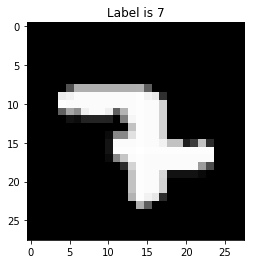

In [29]:
show_num(pixels, label)

In [30]:
# FPS = 2

# def convert_frames_to_video(frame_array, out_name, fps=10):

#     height, width, layers = frame_array[0].shape
#     size = (width, height)
#     out = cv2.VideoWriter(out_name, cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
 
#     for i in range(len(frame_array)):
#         # writing to a image array
#         out.write(frame_array[i])
    
#     out.release()

In [48]:
FPS = 2

for i, outputdata in enumerate(splits_images):
    out_name = "../data/mvideos/cam{}_{}_fps.mp4".format(i, i, FPS)
    outputdata *= 255
    outputdata = outputdata.astype(np.uint8)

    fourcc = cv2.VideoWriter_fourcc(*'mp4v') # Be sure to use lower case
    out = cv2.VideoWriter(outputdata, cv2.VideoWriter_fourcc(*'PIM1'), FPS, (28, 28), False)

    for frame in outputdata:
        if i == 0:
            print(frame.shape)
        out.write(frame) # Write out frame to video


    out.release()
    print('\r{}'.format(i), end="")

c:\program files\python\python36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """


TypeError: must be real number, not tuple

In [10]:
import io
import base64
from IPython.display import HTML
import os

In [14]:
video_path = "data/cam1/videos/cam1_{}_fps.mp4".format(FPS)

In [15]:
os.path.isfile(video_path)

True

In [38]:
import cv2
import time

def video_emitter(video):
    # Open the video
    video = cv2.VideoCapture(video)
    print('Emitting.....')
    i = 0
    # read the file
    while (video.isOpened):
        # read the image in each frame
        success, image = video.read()
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print(gray.shape)
        print(type(image))
        show_num(gray)
        print(gray-1)
        break

        # check if the file has read to the end
        if not success:
            print("BREAK AT FRAME: {}".format(i))
            break
        # convert the image png
#        ret, jpeg = cv2.imencode('.png', image)
#         print(jpeg.shape)
        # Convert the image to bytes, create json message and send to kafka
#         message = {"timestamp":time.time(), "frame":np_to_json()}
#         producer.send(topic, jpeg.tobytes())
        # To reduce CPU usage create sleep time of 0.1sec  
        time.sleep(0.3)
        i += 1

    # clear the capture
    video.release()
    print('Done Emitting...')

Emitting.....
(28, 28)
<class 'numpy.ndarray'>


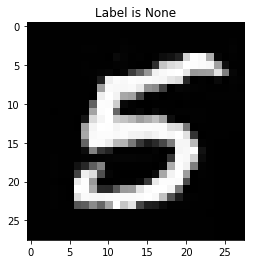

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0   0   0   1   0]
 [  0   0   0   0   0   0   0   1   1   0   0   0   2   1   0   0   0   0
    0   0   0   0   0   0   0   0   2   0]
 [  0   0   0   0   0   0   0   0   0   0 255   8   3   0   1 255   1  12
   17  32 210 253 248 172   5 255   1   0]
 [  0   0   0   0   0   0   0   1   0   0   0   2   2   0 255 255  46 196
  218 226 254 252 249 246 160  14   0   0]
 [  0   0   0   0   0   0   0   1   1   3   5 255   5  60  94 149 240 248
  252 254 230 153 156 158 225 126   5   0]
 [  0   0   0   0   0   0   0   0   1  29 238 250 247 252 250 250 247 245
  229 220  40 255   1 255   8 255   2   1]
 [  0   0   0   0   0   0   0   0   0 157 249 247 246 248 233 14

In [39]:
video_emitter(video_path)

In [23]:
%%HTML
<video width="280" height="280" controls>
  <source src="data/cam1/videos/cam1_2_fps.mp4" type="video/mp4">
</video>

In [42]:
import numpy as np
import time
import cv2
from kafka import KafkaProducer
import os
import json
from utils import np_to_json

CAMERA_NUM = 0
FPS = 5
GRAY = True

#  connect to Kafka
producer = KafkaProducer(bootstrap_servers=['localhost:9092'], value_serializer=lambda hashmap: json.dumps(hashmap))

# Assign a topic
topic = 'frames'

# serving from s3 bucket via cloudFront: url to the object
cfront_endpoint = "http://d3tj01z94i74qz.cloudfront.net/"
cfront_url = cfront_endpoint + "cam{}/videos/cam{}_{}_fps.mp4".format(CAMERA_NUM, CAMERA_NUM, FPS)

# print(os.listdir("/home/ubuntu/eye_of_sauron/data/cam1/videos/"))


def video_emitter(video):
    
    # Open the video
    print('Monitoring Stream from: ', video)
    video = cv2.VideoCapture(video)
    print('Emitting.....')
    
    # monitor frame number
    i = 0
    
    # read the file
    while (video.isOpened):
        
        # read the image in each frame
        success, image = video.read()
        
        # check if the file has read to the end
        if not success:
            print("BREAK AT FRAME: {}".format(i))
            break

        # convert the image png --> display
        ret, png = cv2.imencode('.png', image)
        
        if GRAY:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # (28, 28)
        
        # serialize numpy array --> model
        frame_dict = np_to_json(image.astype(np.uint8)) # {'frame': base64.b64encode(obj.tostring()).decode("utf-8"),
                                                        #  'dtype': obj.dtype.str,
                                                        #  'shape': obj.shape}
        
        # Convert the image to bytes, create json message and send to kafka
        message = {"timestamp":time.time(), "camera":CAMERA_NUM, "display":jpeg.tobytes()}
        
        message.update(frame_dict)
        print(message)
        producer.send(topic, message)
        
        # To reduce CPU usage create sleep time of 0.1sec  
        time.sleep(0.1)
        i += 1

    # clear the capture
    video.release()
    print('Done Emitting...')  

In [43]:
video_emitter(cfront_url)

Monitoring Stream from:  http://d3tj01z94i74qz.cloudfront.net/cam0/videos/cam0_5_fps.mp4
Emitting.....
{'display': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x1c\x00\x00\x00\x1c\x08\x02\x00\x00\x00\xfdoH\xc3\x00\x00\x03\xa9IDATH\r\xb5\xc1?H[]\x18\x07\xe0\xdf{\xce\xb9IL\x88\x7f\xa0h\x16\t\r\xb4[\x91P\xa1\xa0\x8b\xa0F\xd4 \x1dJ\r\xd9\x1c\xec\xd4\x0e\x82\x0e\x8e\xd6V\x8a\xa5CJ\'\xeb&.\x82 dp\x08N\xba\x84\x18m\xe6\xb6S\x16i!\xad4i\xae\xb9\xf7\x9c\xf7\x83\x0b\x81\x04\xa3\xf8\r}\x1e\xc2?@\xf8\x07\x08\xff\x00\xa1\x1d\x1113<D\xc4\xcc\xf0\x10\x11\x00f\xc6\x1d\x10\xda\x11\x91\x94\x12\x80\xf1\xa0I)\xe5\xba.<]]]\xb6m\x87B\xa1j\xb5*\xa5\x04\xc0\xcc\xc6\x184\x11Z\x10\x113\xa3\x93P(dY\x96\xcf\xe7K\xa7\xd3\x03\x03\x03\x0f\x1e<x\xf5\xea\xd5\xdb\xb7o\x17\x16\x16*\x95J&\x93y\xfd\xfa5\x9a\x08-\x94R\xae\xeb\x02\x08\x87\xc3>\x9f\xaf\xa7\xa7gll,\x1e\x8fG"\x91\xd9\xd9Y\xd7u\xc3\xe10<\xdf\xbf\x7f?==\x9d\x9b\x9b\xabV\xab\xa5Riss3\x97\xcb\xa1\x89\xd0DDRJ\xd7u\xc3\xe1p4\x1a\xcd\xe5r\xf7\xee\xddSJi\xad\x8d1

TypeError: b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x1c\x00\x00\x00\x1c\x08\x02\x00\x00\x00\xfdoH\xc3\x00\x00\x03\xa9IDATH\r\xb5\xc1?H[]\x18\x07\xe0\xdf{\xce\xb9IL\x88\x7f\xa0h\x16\t\r\xb4[\x91P\xa1\xa0\x8b\xa0F\xd4 \x1dJ\r\xd9\x1c\xec\xd4\x0e\x82\x0e\x8e\xd6V\x8a\xa5CJ\'\xeb&.\x82 dp\x08N\xba\x84\x18m\xe6\xb6S\x16i!\xad4i\xae\xb9\xf7\x9c\xf7\x83\x0b\x81\x04\xa3\xf8\r}\x1e\xc2?@\xf8\x07\x08\xff\x00\xa1\x1d\x1113<D\xc4\xcc\xf0\x10\x11\x00f\xc6\x1d\x10\xda\x11\x91\x94\x12\x80\xf1\xa0I)\xe5\xba.<]]]\xb6m\x87B\xa1j\xb5*\xa5\x04\xc0\xcc\xc6\x184\x11Z\x10\x113\xa3\x93P(dY\x96\xcf\xe7K\xa7\xd3\x03\x03\x03\x0f\x1e<x\xf5\xea\xd5\xdb\xb7o\x17\x16\x16*\x95J&\x93y\xfd\xfa5\x9a\x08-\x94R\xae\xeb\x02\x08\x87\xc3>\x9f\xaf\xa7\xa7gll,\x1e\x8fG"\x91\xd9\xd9Y\xd7u\xc3\xe10<\xdf\xbf\x7f?==\x9d\x9b\x9b\xabV\xab\xa5Riss3\x97\xcb\xa1\x89\xd0DDRJ\xd7u\xc3\xe1p4\x1a\xcd\xe5r\xf7\xee\xddSJi\xad\x8d1\xf5z=\x14\n1\xb31\xc6u\xdd\xc5\xc5E\xc7q\x88\xa8\\.\xff\xfc\xf9\xf3\xdb\xb7ohAh!\xa5\xd4ZK)\xbb\xbb\xbbONN\xee\xdf\xbf\xcf\xcc\xc1`Pk]\xab\xd5\xbe~\xfdzqq1==\xed8N \x10 "x\x98\x19\xed\x08-\x84\x10\xc6\x18!\x04\x11MNN>\x7f\xfe\xbcX,~\xfa\xf4\xe9\xea\xea\xaaX,NMM\x19c\x06\x07\x07\x97\x96\x96^\xbe|\xa9\xb5fftBhAD\xccLM\x96e\xd9\xb6\xbd\xbb\xbb\x9bN\xa7S\xa9\xd4\xde\xde\x1e\x11\t!\\\xd7\r\x04\x02\xb6m\xe3\x06\x84k\xa8\t\x80eYkkk/^\xbc(\x95Jccc\x00|>_\xa3\xd1\xc0\xad\x08\xd7\x90\x07\x1ec\x0c\x80l6\x9bL&\'&&\x8e\x8e\x8e\xe0\t\x04\x02\xb6m\xe3\x06\x84N\x88\x08\x1ef\x06\x10\x8b\xc5\xf2\xf9|\xadV+\x14\n\xb9\\nkk\x0b\xb7"\xdc\xcd\xd3\xa7O?\x7f\xfe\xdc\xdd\xdd\r`mmm{{\xfb\xc7\x8f\x1f\xb8\x01\xe1\x0e\x88H)\xf5\xf0\xe1\xc3w\xef\xde\x8d\x8f\x8f\x1bcvvvVWW\x7f\xff\xfeMD\xcc\x8cv\x84\xff#\x18\x0c\xce\xcf\xcfooo\xd7\xeb\xf5\xe3\xe3\xe3\x99\x99\x19\xa5\x94\xe38hG\xb8\x03"\xb2,\xab\xd1h\x00\x90R\xd6j5!D\xa3\xd1H$\x12\x85B\xc1q\x1c\xcb\xb2\x1c\xc7A\x13\xe1\xce\x86\x86\x86\x92\xc9\xe4\xe8\xe8h"\x91\x00\xf0\xe5\xcb\x97\xe1\xe1a)\xa5\xd6ZJ\xa9\xb5F\x13\xe1\x0e\x1e=z\xb4\xb8\xb8\x98J\xa5\xfa\xfa\xfa\x8c1R\xcaz\xbd\x9e\xcf\xe7\'&&\xd0DD\xcc\x0c\x0f\xe1V\x91H\xe4\xd9\xb3g\xcb\xcb\xcb\xd1h\xd4\x18S\xab\xd5|>_\xa1P\xd8\xd8\xd88<<\xc4\r\x08\xd7\x08!\x00\xf4\xf7\xf7?~\xfcx}}=\x1e\x8f;\x8eCD\x00\xce\xcf\xcf766\x0e\x0e\x0e\x00(\xa5\\\xd7E\'\x84\x16\xe4\xe9\xed\xed\xcdd2###\xb1X\xec\xd7\xaf_J)\xbf\xdf\x7fvv\xf6\xfe\xfd\xfbl6\xeb8\x0e<B\x08c\x0c:!\xb4x\xf2\xe4\xc9\xca\xcaJ<\x1e\x8f\xc5b\x7f\xfe\xfc\t\x87\xc3WWW\xd5j5\x93\xc9|\xfc\xf8\xf1\xf2\xf2RJ\xa9\xb5VJ\x19c\xd8\x83N\x08-\xde\xbcy\xb3\xbc\xbc\xac\x94\xfa\xfb\xf7o\xb9\\\xde\xdf\xdf\xf7\xfb\xfd\x1f>|\xa8T*\x00\x98\x19\x003\x0b!\x8c\x077 \xb4\x0b\x04\x02\xb6mK)\x85\x10\xc6\x18\xad5\xae\x11B03\x00fF\'\x84vB\x08c\x0c\x00)%\x00\xad5\x1113Z\x10\x11<\xcc\x8cN\x08\xed\x88\x08\x80\x94\xd2x\x00\x10\x11n\xc0\xcc\xe8\xe4?\xf4b\xb3,\xe8\x0b)\xaf\x00\x00\x00\x00IEND\xaeB`\x82' is not JSON serializable

In [49]:
ret, jpeg = cv2.imencode('.png', pixels)
type(jpeg.tobytes().decode('latin1'))

str

In [51]:
'ass'.encode('latin1')

b'ass'